In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [34]:
import seaborn as sns

In [2]:
df=pd.read_csv("../all_ratings.csv")
df.head()

,movie_id,user_id,rating
0,4500,2532865,4
1,4500,573364,3
2,4500,1696725,3
3,4500,1253431,3
4,4500,1265574,2


In [3]:
titles_df = pd.read_csv("../flask/static/movie_titles.csv",header = None, names = ['movie_id', 'year', 'title'], usecols=[0,1,2],encoding = "ISO-8859-1")
titles_df.head()

,movie_id,year,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [4]:
mvc=df["movie_id"].value_counts()

In [7]:
mvc.head(10)

5317     232944
15124    216596
14313    200832
15205    196397
1905     193941
6287     193295
11283    181508
16377    181426
16242    178068
12470    177556
Name: movie_id, dtype: int64

In [8]:
def get_title(df, movie_id):
    return df[df.movie_id==movie_id].iloc[0].title

In [11]:
get_title(titles_df, 15124)

'Independence Day'

In [12]:
titles_df[titles_df["title"]=="Lost: Season 1"]

,movie_id,year,title
3455,3456,2004.0,Lost: Season 1


In [13]:
mvc[3455]

1073

In [15]:
ratings = df.groupby(['movie_id']).mean()

,user_id,rating
movie_id,,
1,1.249876e+06,3.749543
2,1.341926e+06,3.558621
3,1.324290e+06,3.641153
4,1.402854e+06,2.739437
5,1.302384e+06,3.919298


In [17]:
ratings.sort_values('rating', ascending=False).head(10)

,user_id,rating
movie_id,,
14961,1.323372e+06,4.723270
7230,1.321944e+06,4.716611
7057,1.323699e+06,4.702611
3456,1.322432e+06,4.670989
9864,1.322252e+06,4.638809
15538,1.347063e+06,4.605021
8964,1.360784e+06,4.600000
14791,1.347371e+06,4.600000
10464,1.241350e+06,4.595506


In [20]:
get_title(titles_df,14961)

'Lord of the Rings: The Return of the King: Extended Edition'

In [28]:
top_ratings = ratings.sort_values('rating', ascending=False).head(15)["rating"]

In [36]:
sns.set(style='darkgrid')

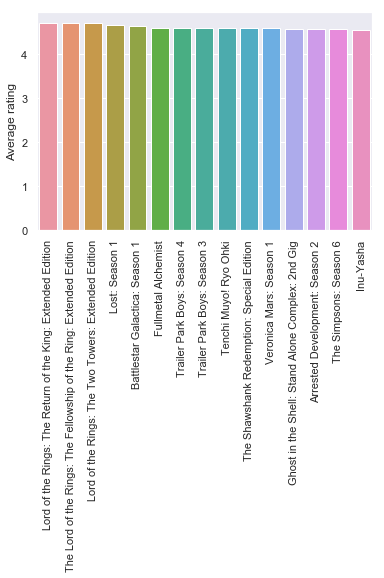

In [38]:
x_vals = [get_title(titles_df, x) for x in top_ratings.keys()]
y_vals = top_ratings.values
plt.xticks(rotation=90)
sns.barplot(x_vals, y_vals)
plt.ylabel("Average rating")
plt.show()

In [31]:
top_counts = mvc.head(15)

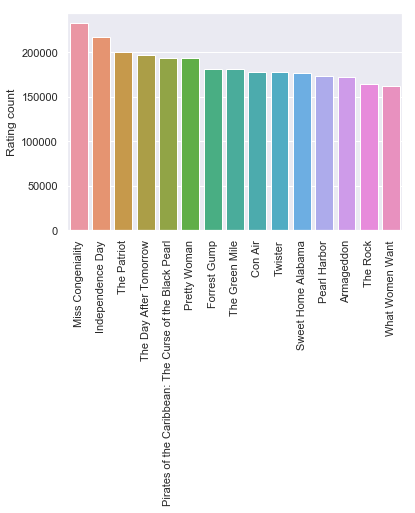

In [39]:
x_vals = [get_title(titles_df, x) for x in top_counts.keys()]
y_vals = top_counts.values
plt.xticks(rotation=90)
sns.barplot(x_vals, y_vals)
plt.ylabel("Rating count")
plt.show()

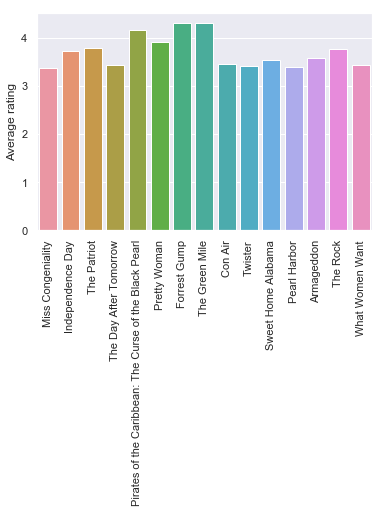

In [44]:
x_vals = [get_title(titles_df, x) for x in top_counts.keys()]
y_vals = [ratings["rating"][x] for x in top_counts.keys()]
plt.xticks(rotation=90)
sns.barplot(x_vals, y_vals)
plt.ylabel("Average rating")
plt.show()